AUC:0.997


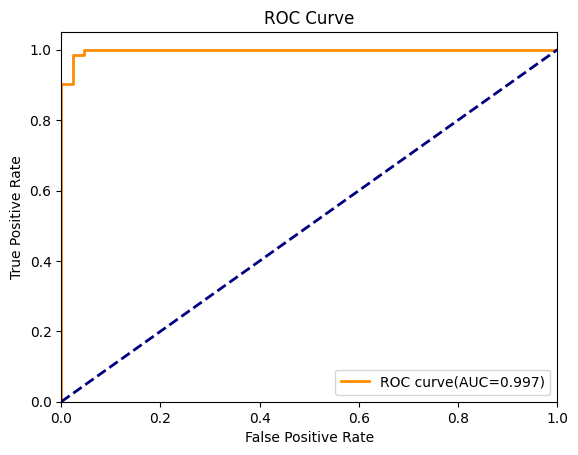

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

X,y=load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test_local = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test_local, y_pred_proba)
print(f"AUC:{auc_score:.3f}")
fpr, tpr, _ = roc_curve(y_test_local, y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve(AUC={auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()